This notebook only shows the results and visualzations for the first 3-day period namely 27th Feb, 28th Feb and 1st March. The code for the later 3-day period is the same.

### Loading Libraries

In [51]:
pip install geopy

In [1]:
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
import numpy as np
import pandas as pd
import re
import string

### Loading Labeled Sentiment Data Set from Part 1

In [120]:
df_1 = pd.read_csv("SentimentAnalysisFEB27.csv", lineterminator='\n')
df_2 = pd.read_csv("SentimentAnalysisFEB28.csv", lineterminator='\n')
df_3 = pd.read_csv("SentimentAnalysisMAR01.csv", lineterminator='\n')
sentiment_df = pd.concat([df_1,df_2, df_3], axis = 0)

In [121]:
sentiment_df = sentiment_df[sentiment_df.Sentiment != 'ERROR']

### EDA

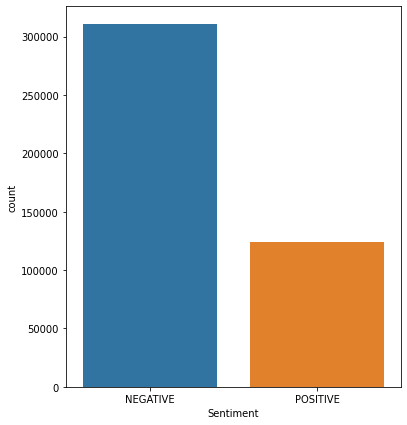

In [124]:
plt.figure(figsize = (6,7))
sns.countplot(x="Sentiment", data=sentiment_df)

### Loading Dataset

In [117]:
csv_collection = ["/content/0419_UkraineCombinedTweetsDeduped.csv.gzip","/content/0420_UkraineCombinedTweetsDeduped.csv.gzip","/content/0421_UkraineCombinedTweetsDeduped.csv.gzip"]
df = pd.read_csv(csv_collection[0], compression = 'gzip')
for i in range(1, len(csv_collection)):
    tmp = pd.read_csv(csv_collection[i], compression = 'gzip')
    df = pd.concat([df, tmp], axis=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [92]:
csv_collection = ["/content/UkraineCombinedTweetsDeduped20220227-131611.csv.gzip","/content/UkraineCombinedTweetsDeduped_FEB27.csv.gzip","/content/UkraineCombinedTweetsDeduped_FEB28_part1.csv.gzip","/content/UkraineCombinedTweetsDeduped_FEB28_part2.csv.gzip","/content/UkraineCombinedTweetsDeduped_MAR01.csv.gzip"]
df = pd.read_csv(csv_collection[0], compression = 'gzip')
for i in range(1, len(csv_collection)):
    tmp = pd.read_csv(csv_collection[i], compression = 'gzip')
    df = pd.concat([df, tmp], axis=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Preprocessing Text

In [93]:
def clean_text(preprocess_text):
  
    preprocess_text = preprocess_text.lower() #text to lower

    preprocess_text = re.sub(r'\[.*?\]', '', preprocess_text)  #remove text in square bracket
   
    preprocess_text = re.sub(r'[%s]' % re.escape(string.punctuation), '', preprocess_text) #remove punctuation 

    preprocess_text = re.sub(r'\w*\d\w*', '', preprocess_text) #remove words containing numbers
  
    preprocess_text = re.sub(r'http\S+', '', preprocess_text) #remove links 
  
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    
    preprocess_text = regrex_pattern.sub(r'', preprocess_text)
    return preprocess_text

In [94]:
df_en = df[df.language == 'en'].drop('language', axis=1)

In [95]:
tweetsdf = pd.DataFrame(df_en.text.apply(lambda x: clean_text(x)))

In [96]:
df_en['processed_text'] = tweetsdf 

In [97]:
df_en = df_en.drop("text", 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [98]:
df_en = df_en.rename(columns={"processed_text": "text"})

In [99]:
sentiment_df = pd.merge(sentiment_df, df_en, on = "tweetid", how = "left") #Merging original dataset with labeled dataset

In [100]:
sentiment_df = sentiment_df.dropna(subset=['location']) #Dropping null values for visualization

In [101]:
sentiment_df_100 = sentiment_df.sort_values(by = ['favorite_count'], ascending= False)[:100] #Reorder by favorite cout

In [102]:
sentiment_df_100

,Unnamed: 0_x,tweetid,processed_text,hashtags_x,Sentiment,Sentiment_Score,Unnamed: 0_y,userid,username,acctdesc,...,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,hashtags_y,coordinates,favorite_count,extractedts,text
70979,902028,1497517968338522114,bloodshed follows bloodshed\nwhat have we lear...,"[{'text': 'YOSHIKI', 'indices': [97, 105]}, {'...",NEGATIVE,0.9655,902028,164043817,YoshikiOfficial,Card→ https://t.co/zstzW6ePyz\nInstagram→ http...,...,869392,13756,2010-07-07 22:30:26.000000,2022-02-26 10:24:40.000000,95,"[{'text': 'YOSHIKI', 'indices': [97, 105]}, {'...",NaN,333,2022-02-26 10:28:46.954156,bloodshed follows bloodshed\nwhat have we lear...
370579,218562,1498303509749456899,no matter how many cities his takes putin will...,"[{'text': 'Putin', 'indices': [37, 43]}, {'tex...",NEGATIVE,0.8385,1717380,15745368,marcorubio,"Banned in & sanctioned by China,Follower of Ch...",...,4278915,15668,2008-08-06 03:07:06.000000,2022-02-28 14:26:08,67,"[{'text': 'Putin', 'indices': [37, 43]}, {'tex...",NaN,268,2022-02-28 14:29:32.586389,no matter how many cities his takes putin will...
49338,321372,1497018785060081664,ukraine’s air force says ukrainian sukhoi dow...,"[{'text': 'Russia', 'indices': [89, 96]}, {'te...",NEGATIVE,0.9969,321372,1493461127472242691,WW32022,PUTIN DECLARES WAR ON UKRAINE on Thursday 24th...,...,23098,267,2022-02-15 05:44:22.000000,2022-02-25 01:21:06.000000,22,"[{'text': 'Russia', 'indices': [89, 96]}, {'te...",NaN,167,2022-02-25 01:25:46.473499,ukraine’s air force says ukrainian sukhoi dow...
456979,78394,1498518477283463172,good morning my beautiful city defaced by thos...,"[{'text': 'Russia', 'indices': [49, 56]}, {'te...",POSITIVE,0.9949,227606,1219232377605644289,lesiavasylenko,"Ukrainian MP, @goloszmin, working mom of 3 lov...",...,62304,554,2020-01-20 12:17:30.000000,2022-03-01 04:40:20,26,"[{'text': 'Russia', 'indices': [49, 56]}, {'te...",NaN,123,2022-03-01 04:45:46.407183,good morning my beautiful city defaced by thos...
211876,1164472,1497744022659493891,anonymous took down russia today putins propag...,"[{'text': 'Anonymous', 'indices': [0, 10]}, {'...",NEGATIVE,0.9995,1164472,373157754,YourAnonCentral,Exposing Human Rights abuses. Actions Not Noun...,...,5598413,323540,2011-09-14 02:53:08.000000,2022-02-27 01:22:56,17,"[{'text': 'Anonymous', 'indices': [0, 10]}, {'...",NaN,119,2022-02-27 01:24:38.219519,anonymous took down russia today putins propag...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328987,88310,1498395048622366729,hundreds of thousands of people are now follow...,"[{'text': 'Ukraine', 'indices': [158, 166]}, {...",POSITIVE,0.9773,88310,1032868256510566401,ITarmyUA,Welcome to 🇺🇦 IT Army Twitter account! We Repr...,...,20602,166,2018-08-24 05:52:36.000000,2022-02-28 20:29:53,6,"[{'text': 'Ukraine', 'indices': [158, 166]}, {...",NaN,35,2022-02-28 20:32:05.255954,hundreds of thousands of people are now follow...
332667,8390,1498095800131493891,now fighters jets in the sky over zhlobin flyi...,"[{'text': 'Zhlobin', 'indices': [70, 78]}, {'t...",POSITIVE,0.7626,1507208,1493461127472242691,WW32022,PUTIN DECLARES WAR ON UKRAINE on Thursday 24th...,...,47981,689,2022-02-15 05:44:22.000000,2022-02-28 00:40:46,6,"[{'text': 'Zhlobin', 'indices': [70, 78]}, {'t...",NaN,35,2022-02-28 00:43:49.523990,now fighters jets in the sky over zhlobin flyi...
414019,64524,1498506258143404033,update slovakia announces that anyone expressi...,"[{'text': 'Ukraine', 'indices': [108, 116]}, {...",NEGATIVE,0.9998,213736,1495033308669005824,IntelNessa,Independent Journalist reporting on Breaking N...,...,5373,278,2022-02-19 13:51:41.000000,2022-03-01 03:51:47,7,"[{'text': 'Ukraine', 'indices': [108, 116]}, {...",NaN,34,2022-03-01 04:01:16.647742,update slovakia announces that anyone expressi...
357679,1827,1498088418479419400,tank commander vitaliy sapylo \nonly years ol...,"[{'text': 'Ucrania', 'indices': [70, 78]}, {'t...",NEGATIVE,0.7221,1500645,

### EDA

Creating a Latitude Longitude Column from Location

In [103]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="GetLoc")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)

latitude = []
longitude = []
for i in sentiment_df_100["location"]:
   getLoc = geocode(i)
   if not getLoc:
     getLoc = geocode("None")
   latitude.append(getLoc.latitude)
   longitude.append(getLoc.longitude)
 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Karachi and Dubai',), **{}).
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/geopy/geocoders/base.py", line 344, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "/usr/lib/python3.7/urllib/request.py", line 525, in open
    response = self._open(req, data)
  File "/usr/lib/python3.7/urllib/request.py", line 543, in _open
    '_open', req)
  File "/usr/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.7/urllib/request.py", line 1393, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "/usr/lib/python3.7/urllib/request.py", line 1353, in do_open
    r = h.getresponse()
  File "/usr/lib/python3.7/http/client.py", line 1373, in getresponse
    response.begin()
  File "/usr/lib/python3.7/http/client.py", line 319, in begin
    version, status, reason = self._read_status()

In [104]:
sentiment_df_100['latitude'] = latitude
sentiment_df_100['longitude'] = longitude

In [105]:
sentiment_df_100

,Unnamed: 0_x,tweetid,processed_text,hashtags_x,Sentiment,Sentiment_Score,Unnamed: 0_y,userid,username,acctdesc,...,usercreatedts,tweetcreatedts,retweetcount,hashtags_y,coordinates,favorite_count,extractedts,text,latitude,longitude
70979,902028,1497517968338522114,bloodshed follows bloodshed\nwhat have we lear...,"[{'text': 'YOSHIKI', 'indices': [97, 105]}, {'...",NEGATIVE,0.9655,902028,164043817,YoshikiOfficial,Card→ https://t.co/zstzW6ePyz\nInstagram→ http...,...,2010-07-07 22:30:26.000000,2022-02-26 10:24:40.000000,95,"[{'text': 'YOSHIKI', 'indices': [97, 105]}, {'...",NaN,333,2022-02-26 10:28:46.954156,bloodshed follows bloodshed\nwhat have we lear...,34.098003,-118.329523
370579,218562,1498303509749456899,no matter how many cities his takes putin will...,"[{'text': 'Putin', 'indices': [37, 43]}, {'tex...",NEGATIVE,0.8385,1717380,15745368,marcorubio,"Banned in & sanctioned by China,Follower of Ch...",...,2008-08-06 03:07:06.000000,2022-02-28 14:26:08,67,"[{'text': 'Putin', 'indices': [37, 43]}, {'tex...",NaN,268,2022-02-28 14:29:32.586389,no matter how many cities his takes putin will...,39.783730,-100.445882
49338,321372,1497018785060081664,ukraine’s air force says ukrainian sukhoi dow...,"[{'text': 'Russia', 'indices': [89, 96]}, {'te...",NEGATIVE,0.9969,321372,1493461127472242691,WW32022,PUTIN DECLARES WAR ON UKRAINE on Thursday 24th...,...,2022-02-15 05:44:22.000000,2022-02-25 01:21:06.000000,22,"[{'text': 'Russia', 'indices': [89, 96]}, {'te...",NaN,167,2022-02-25 01:25:46.473499,ukraine’s air force says ukrainian sukhoi dow...,48.925890,39.778060
456979,78394,1498518477283463172,good morning my beautiful city defaced by thos...,"[{'text': 'Russia', 'indices': [49, 56]}, {'te...",POSITIVE,0.9949,227606,1219232377605644289,lesiavasylenko,"Ukrainian MP, @goloszmin, working mom of 3 lov...",...,2020-01-20 12:17:30.000000,2022-03-01 04:40:20,26,"[{'text': 'Russia', 'indices': [49, 56]}, {'te...",NaN,123,2022-03-01 04:45:46.407183,good morning my beautiful city defaced by thos...,50.450034,30.524136
211876,1164472,1497744022659493891,anonymous took down russia today putins propag...,"[{'text': 'Anonymous', 'indices': [0, 10]}, {'...",NEGATIVE,0.9995,1164472,373157754,YourAnonCentral,Exposing Human Rights abuses. Actions Not Noun...,...,2011-09-14 02:53:08.000000,2022-02-27 01:22:56,17,"[{'text': 'Anonymous', 'indices': [0, 10]}, {'...",NaN,119,2022-02-27 01:24:38.219519,anonymous took down russia today putins propag...,19.372189,-72.334654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328987,88310,1498395048622366729,hundreds of thousands of people are now follow...,"[{'text': 'Ukraine', 'indices': [158, 166]}, {...",POSITIVE,0.9773,88310,1032868256510566401,ITarmyUA,Welcome to 🇺🇦 IT Army Twitter account! We Repr...,...,2018-08-24 05:52:36.000000,2022-02-28 20:29:53,6,"[{'text': 'Ukraine', 'indices': [158, 166]}, {...",NaN,35,2022-02-28 20:32:05.255954,hundreds of thousands of people are now follow...,49.487197,31.271832
332667,8390,1498095800131493891,now fighters jets in the sky over zhlobin flyi...,"[{'text': 'Zhlobin', 'indices': [70, 78]}, {'t...",POSITIVE,0.7626,1507208,1493461127472242691,WW32022,PUTIN DECLARES WAR ON UKRAINE on Thursday 24th...,...,2022-02-15 05:44:22.000000,2022-02-28 00:40:46,6,"[{'text': 'Zhlobin', 'indices': [70, 78]}, {'t...",NaN,35,2022-02-28 00:43:49.523990,now fighters jets in the sky over zhlobin flyi...,48.925890,39.778060
414019,64524,1498506258143404033,update slovakia announces that anyone expressi...,"[{'text': 'Ukraine', 'indices': [108, 116]}, {...",NEGATIVE,0.9998,213736,1495033308669005824,IntelNessa,Independent Journalist reporting on Breaking N...,...,2022-02-19 13:51:41.000000,2022-03-01 03:51:47,7,"[{'text': 'Ukraine', 'indices': [108, 116]}, {...",NaN,34,2022-03-01 04:01:16.647742,update slovakia announces that anyone expressi...,49.487197,31.271832
357679,1827,1498088418479419400,tank commander vitaliy sapylo \nonly years ol...,"[{'t

World Map Visualization

In [106]:
import folium  

data = sentiment_df_100[['location', 'latitude', 'longitude', 'Sentiment']]
map = folium.Map(location=[20, 0], zoom_start=2)

for j in range(0, len(data)):
        if data.iloc[j]['Sentiment'] == "NEGATIVE":
              folium.Marker([data.iloc[j]['latitude'], data.iloc[j]['longitude']], popup="Sentiment :  " + " \nLocation :" + str(data.iloc[j]['location']),
                              icon=folium.Icon(color='red')).add_to(map)
        else:
                folium.Marker([data.iloc[j]['latitude'], data.iloc[j]['longitude']],
                              popup="Sentiment :  " + " \nLocation : " + str
                              (data.iloc[j]['location']),
                              icon=folium.Icon(color='blue')).add_to(map)
      
          
map

Word Cloud Visualiations

In [107]:
sentiment_neg = sentiment_df.loc[sentiment_df['Sentiment'] == 'NEGATIVE']
sentiment_pos = sentiment_df.loc[sentiment_df['Sentiment'] == 'POSITIVE']

In [108]:
sorted_retweets_neg = sentiment_neg.sort_values(by = ['retweetcount'])
sorted_retweets_pos = sentiment_pos.sort_values(by = ['retweetcount'])

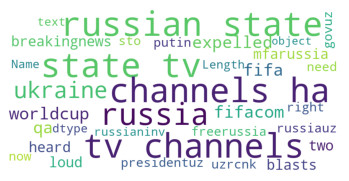

In [110]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(sorted_retweets_neg['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

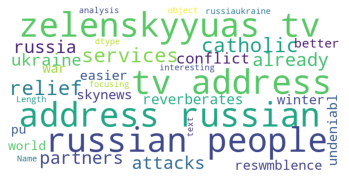

In [111]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(sorted_retweets_pos['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()